In [4]:
# 필요한 패키지 설치
!pip install missingno
import missingno as msno
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

- 한글 폰트 지원

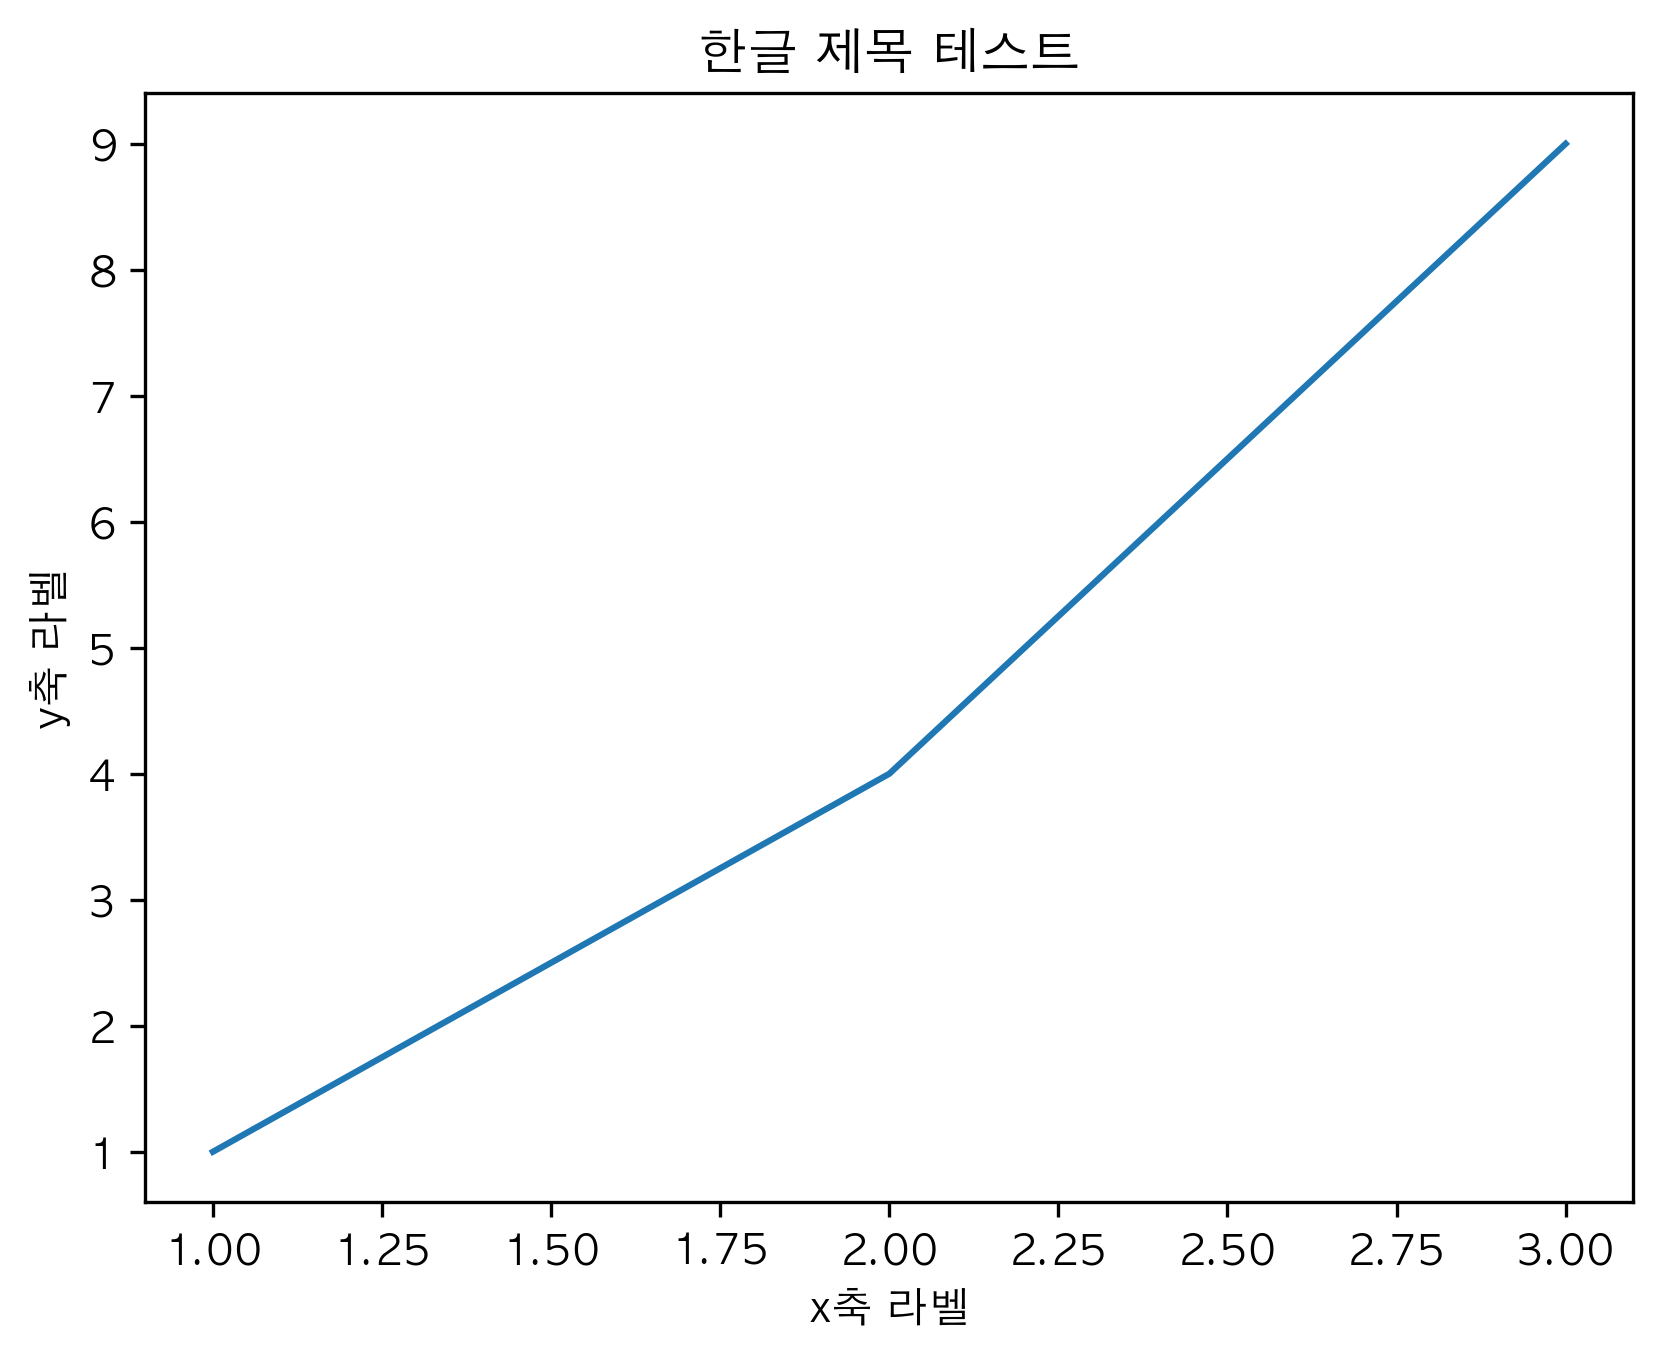

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 맥북에서 기본 제공하는 AppleGothic 폰트의 경로
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 테스트 플롯 (한글 출력 확인용)
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('한글 제목 테스트')
plt.xlabel('x축 라벨')
plt.ylabel('y축 라벨')
plt.show()


In [6]:
# import matplotlib.font_manager as fm

# # 한글 폰트 지원
# font_path = 'C:/Windows/Fonts/malgun.ttf'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

- 데이터 불러오기

    - 일부 결측값 포함된 원본 데이터

In [7]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
# df = pd.read_csv("./resource/datasets/bike_sharing_daily.csv")
df = pd.read_csv("/Users/johyeon-u/source/ip/DA_W3/resource/W3/bike_sharing_daily1.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0.0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0.0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0.0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0.0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [8]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,714.000000,707.000000,706.000000,718.000000,720.000000,720.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.026063,2.997264,0.683995,1.395349,0.497644,0.474674,0.628691,0.191136,848.102778,3658.512500,4505.255814
std,211.165812,NaN,1.110807,0.500342,3.451913,0.159432,2.004787,0.465233,0.544894,0.182952,0.162837,0.142652,0.077166,686.293614,1554.760481,1935.491354
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.341667,0.337842,0.522708,0.135111,314.750000,2499.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502989,0.482942,0.630000,0.181598,717.000000,3660.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.610803,0.731042,0.234156,1095.500000,4753.250000,5956.000000


- 결측값 위치 및 내용 확인

In [9]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     729 non-null    float64
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [10]:
# 결측값 수만 확인
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        2
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

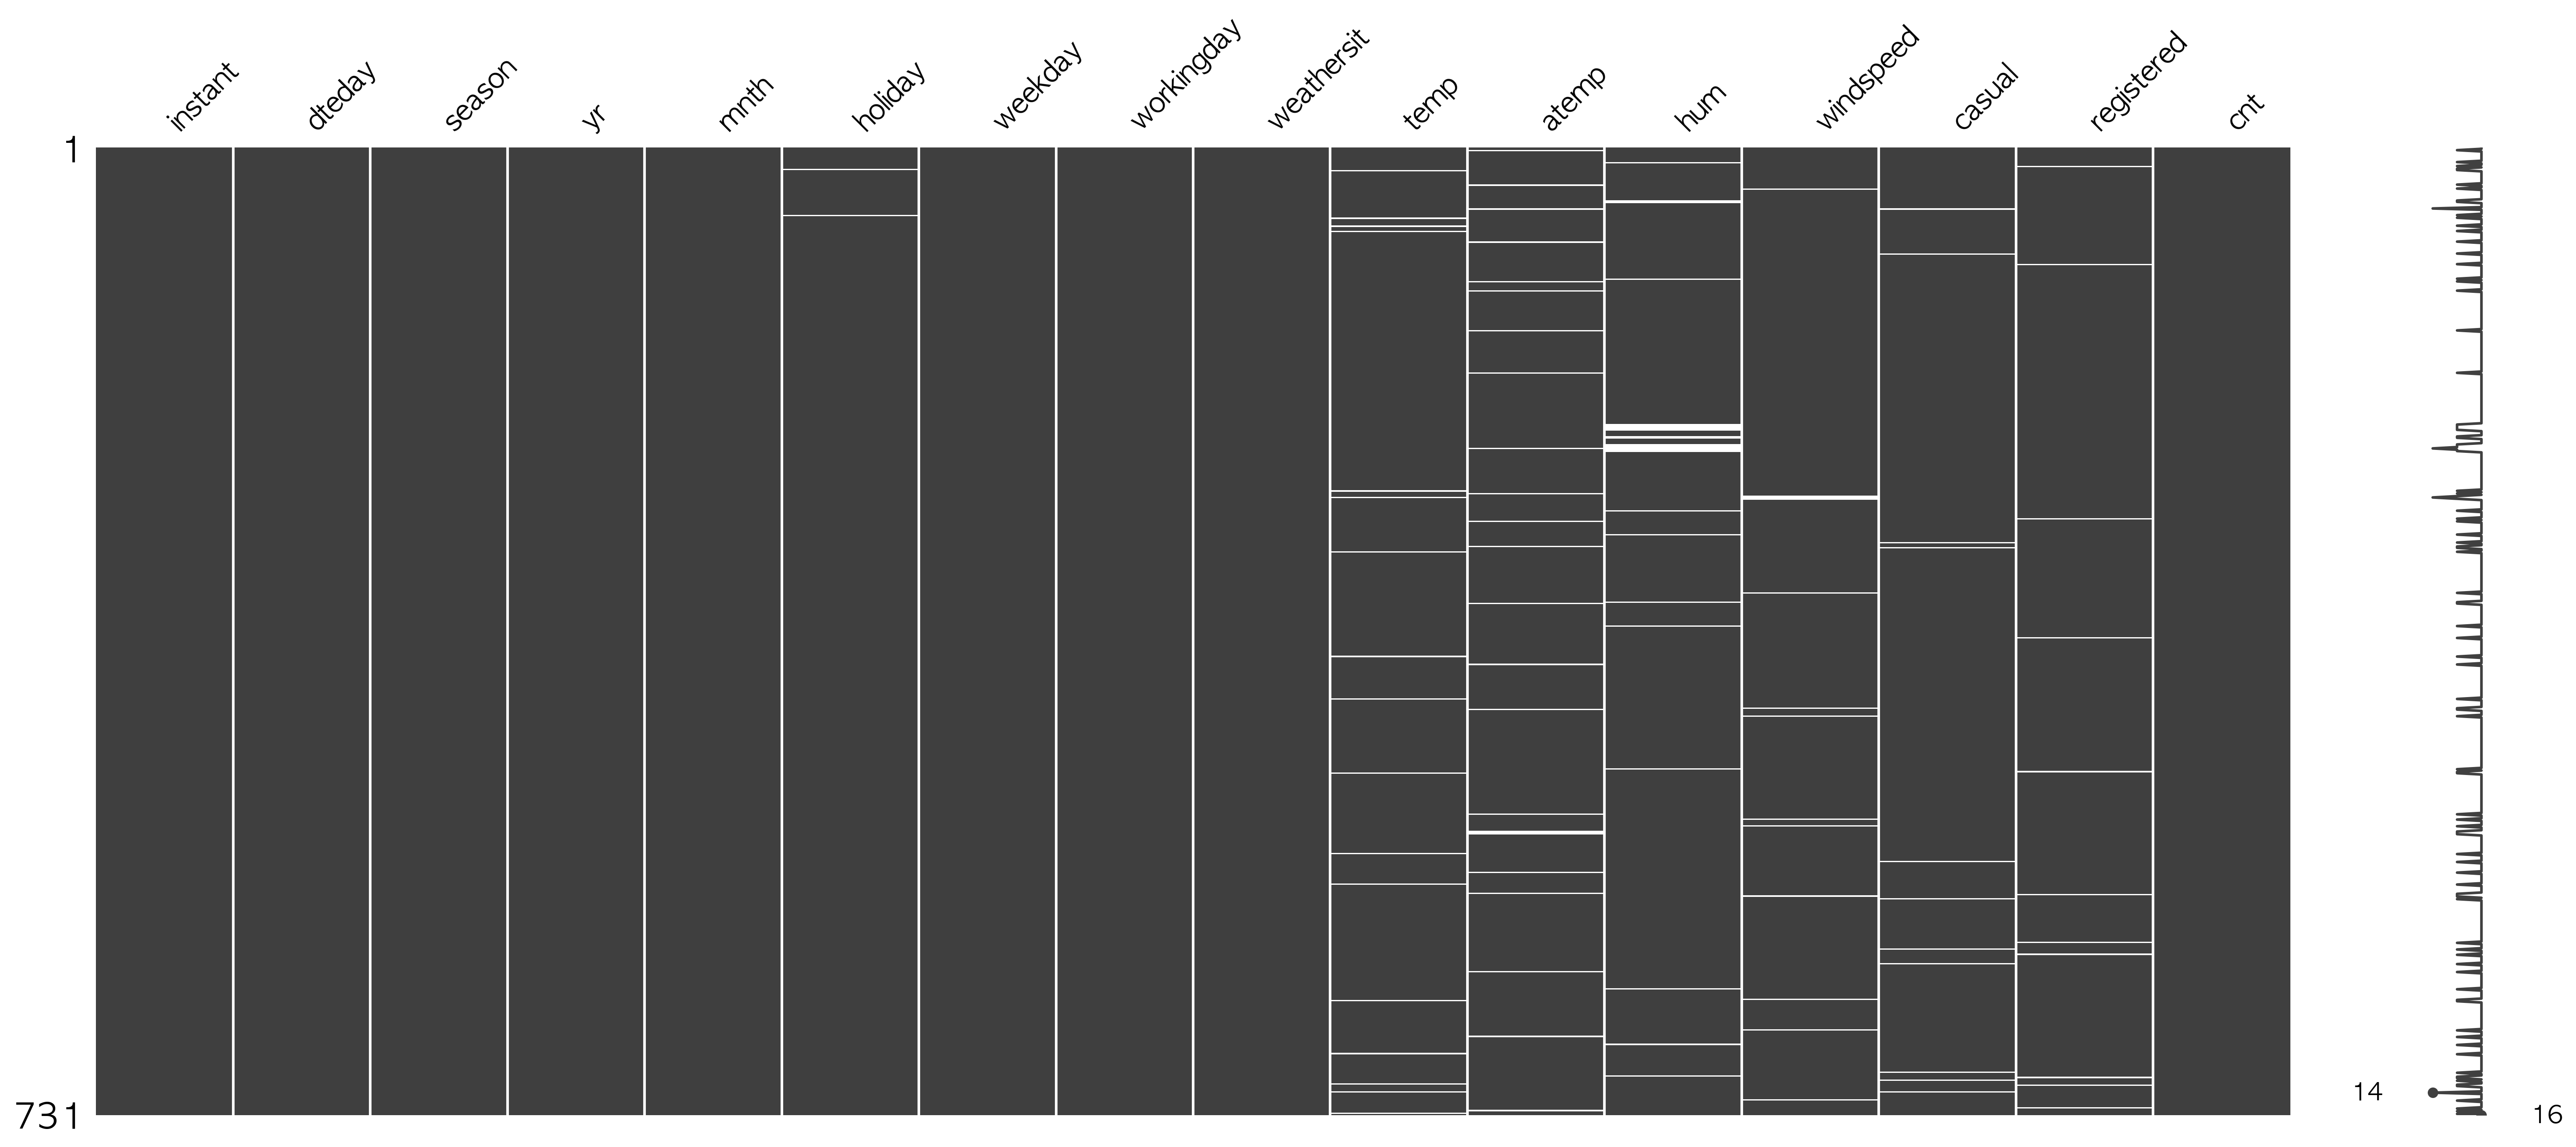

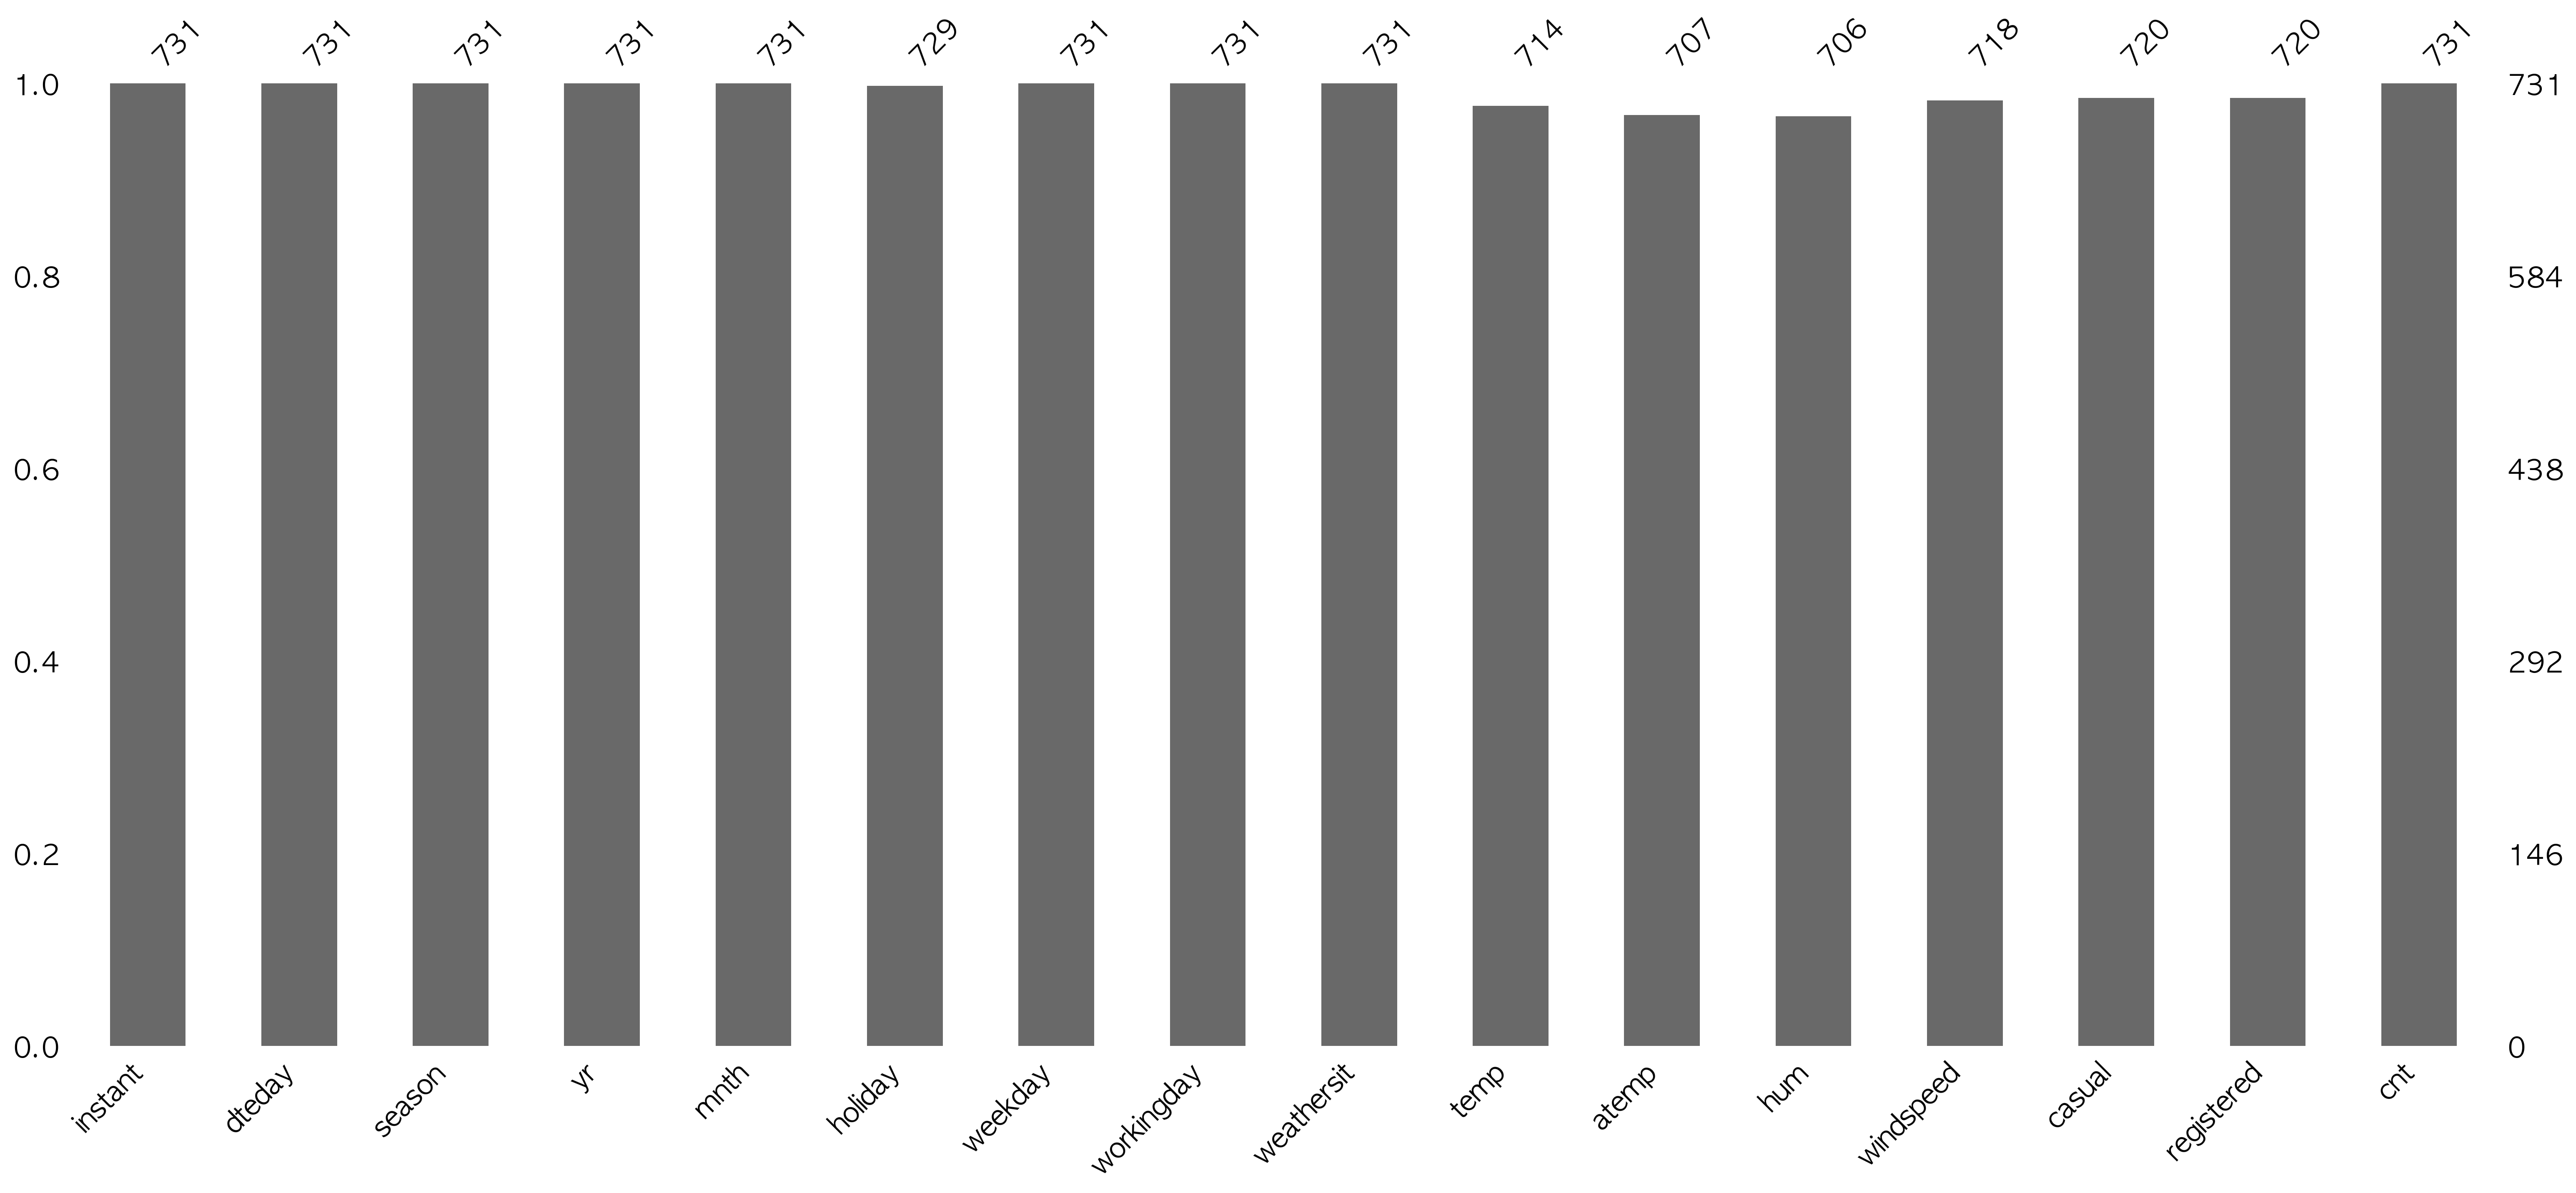

In [11]:
# 결측값 시각화 - 전체 컬럼의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 막대 그래프
msno.bar(df)
plt.show()

In [12]:
# 결측값이 아닌 빈 문자열이 있는지 확인

def is_emptystring(x):
    return x.eq('').any()
 
df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

- 다양한 결측값 제거 방법

In [13]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

In [14]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        2
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [15]:
# df_drop_all.isnull().sum()
# df_drop_3.isnull().sum()
# df_drop_slt.isnull().sum()
df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# df_drop_all.info()
# df_drop_3.info()
# df_drop_slt.info()
df_drop_any.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     632 non-null    int64  
 1   dteday      632 non-null    object 
 2   season      632 non-null    int64  
 3   yr          632 non-null    int64  
 4   mnth        632 non-null    int64  
 5   holiday     632 non-null    float64
 6   weekday     632 non-null    int64  
 7   workingday  632 non-null    int64  
 8   weathersit  632 non-null    int64  
 9   temp        632 non-null    float64
 10  atemp       632 non-null    float64
 11  hum         632 non-null    float64
 12  windspeed   632 non-null    float64
 13  casual      632 non-null    float64
 14  registered  632 non-null    float64
 15  cnt         632 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 83.9+ KB


In [17]:
df.info()  # 결측값 처리된 결과와 결측값 처리 전과의 비교

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     729 non-null    float64
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


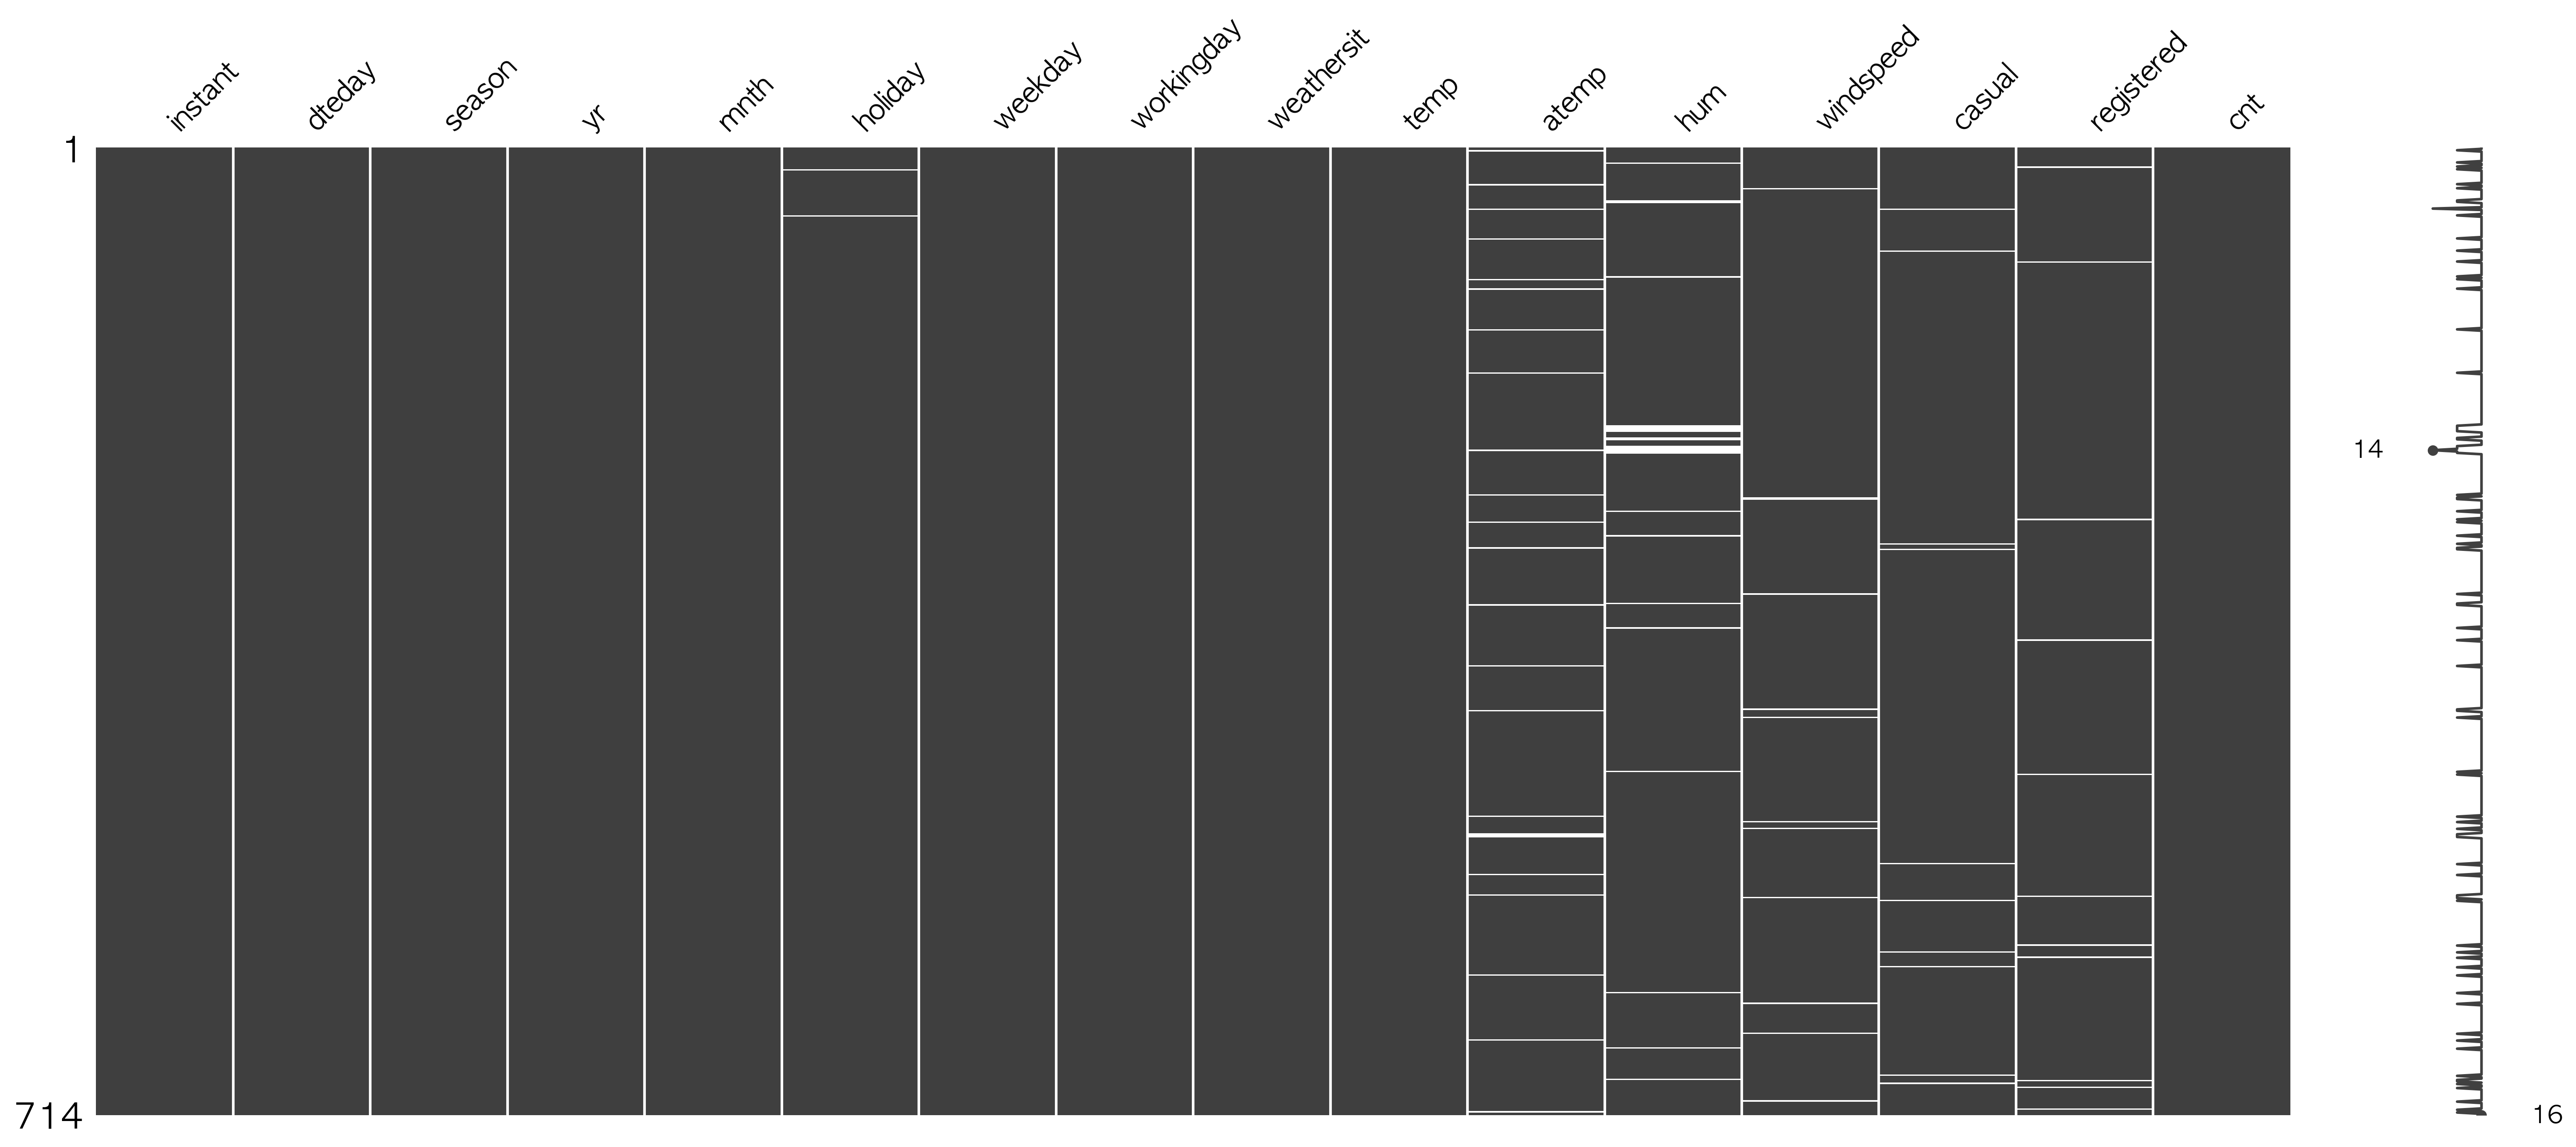

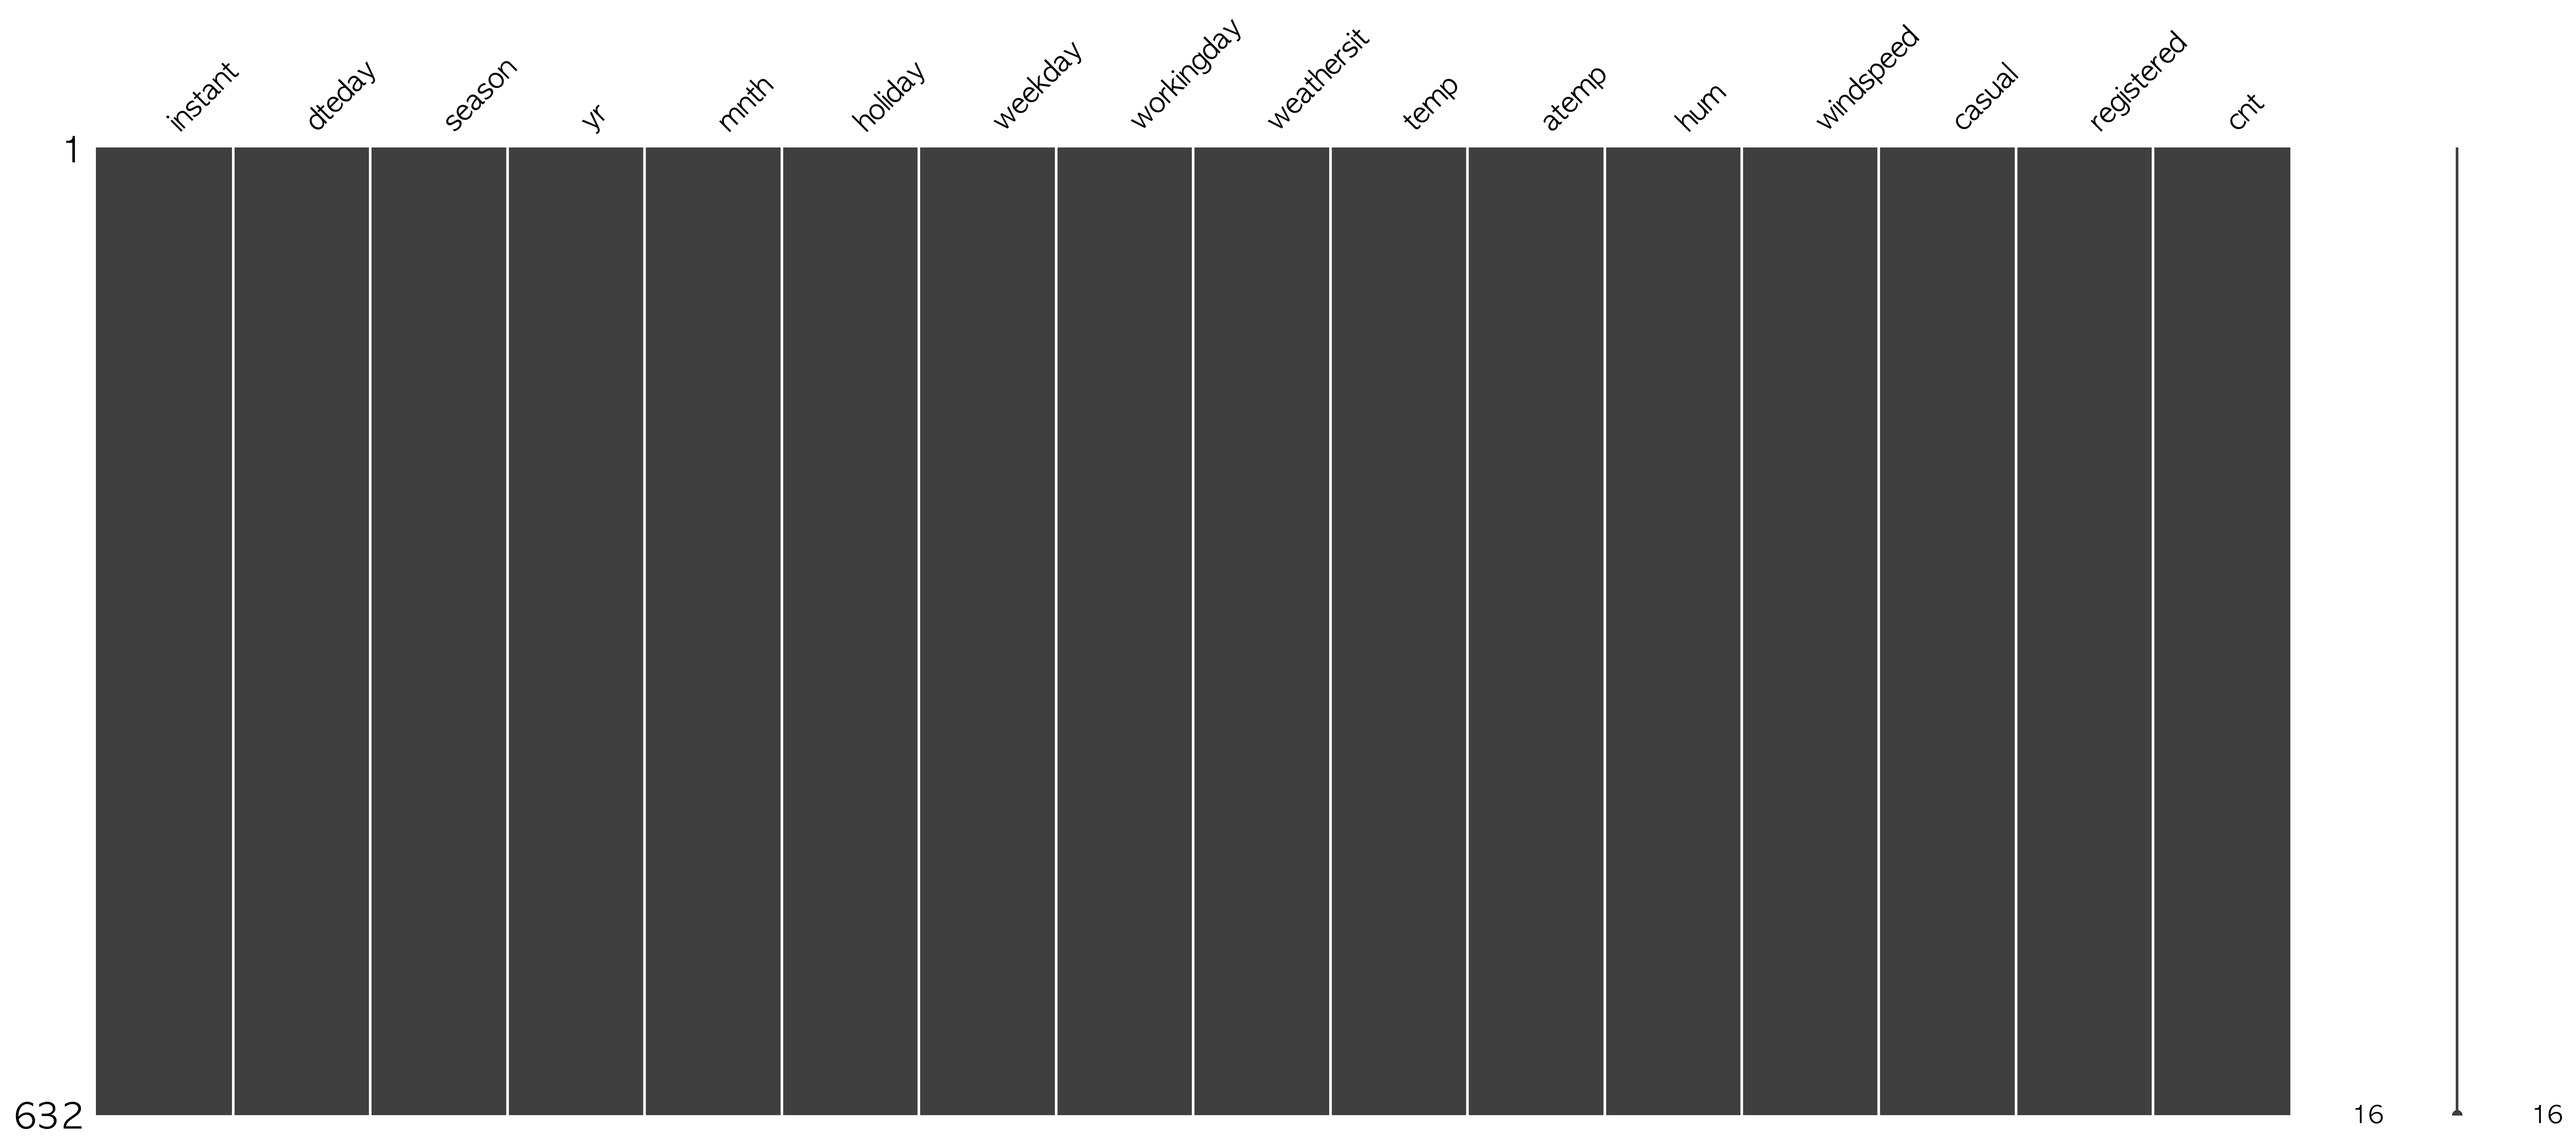

In [18]:
# 결측값 영역 표시
msno.matrix(df_drop_slt)
msno.matrix(df_drop_any)
plt.show()

- 다양한 결측값 대치 방법

In [19]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df.mean(numeric_only=True))

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df.median(numeric_only=True))

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'],'hum':df['hum'].min()})

In [20]:
# df_0_all.isnull().sum()
# df_0_slt.isnull().sum()
# df_mean_all.isnull().sum()
# df_mean_slt.isnull().sum()
# df_median_all.isnull().sum()
# df_median_slt.isnull().sum()
# df_mode_all.isnull().sum()
# df_mode_slt.isnull().sum()
# df_max_all.isnull().sum()
# df_max_slt.isnull().sum()
# df_min_all.isnull().sum()
df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        2
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

- 다양한 결측값 보간 방법

In [21]:
# 결측값 보간 대치 방법들

# 전 시점 값으로 대치 - 컬럼 지정
df1 = df.copy()
df1['temp'].fillna(method ='pad' ,inplace=True)

# 뒤 시점 값으로 대치 - 전체 컬럼
df.fillna(method ='bfill')

# 뒤 시점 값으로 대치 - 결측값 연속 한번만 대치
df.fillna(method='bfill', limit=1)

# 보간법 함수 사용하여 대치 - 단순 순서 방식
ts_intp_linear = df.interpolate(method='values')

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 컬럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday'])

    # dteday 컬럼 인덱스 변경
df_i = df.set_index('dteday') 

    # 시점에 따른 보간법 적용
df_time = df_i.interpolate(method='time')

df_time.isnull().sum()

/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/3290299220.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['temp'].fillna(method ='pad' ,inplace=True)
/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/3290299220.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['temp'].fillna(method ='pad' ,inplace=True)
/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/3290299220.py:8: FutureWar

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Test 데이터에 대한 실습

In [22]:
test_df = pd.DataFrame({#'Number':[1,2,3,4,5,6,7,8,9,10,11,12],
                        'Date':['10/02/2015','11/02/2015', '12/02/2015','13/02/2015','14/02/2015', '15/02/2015','18/02/2015','19/02/2015','20/02/2015', '21/02/2015', '22/02/2015','23/02/2015','24/02/2015'], 
                        'Quantity': [1, 2, '', '', '', '', 9, 10, '', '', 13, 14, 15 ],                         
                        'Sales_Amount': [2, 4, 6, 8, '', '', 18, 20, '', 24, '', '', 30]})
test_df

,Date,Quantity,Sales_Amount
0,10/02/2015,1,2
1,11/02/2015,2,4
2,12/02/2015,,6
3,13/02/2015,,8
4,14/02/2015,,
5,15/02/2015,,
6,18/02/2015,9,18
7,19/02/2015,10,20
8,20/02/2015,,
9,21/02/2015,,24


In [23]:
test_df.isnull().sum()

Date            0
Quantity        0
Sales_Amount    0
dtype: int64

In [24]:
def is_emptystring(x):
    return x.eq('').any()
 
test_df.apply(lambda x:is_emptystring(x))

Date            False
Quantity         True
Sales_Amount     True
dtype: bool

In [25]:
test_df.replace(to_replace='', value=pd.NaT, inplace=True)
test_df

,Date,Quantity,Sales_Amount
0,10/02/2015,1,2
1,11/02/2015,2,4
2,12/02/2015,NaT,6
3,13/02/2015,NaT,8
4,14/02/2015,NaT,NaT
5,15/02/2015,NaT,NaT
6,18/02/2015,9,18
7,19/02/2015,10,20
8,20/02/2015,NaT,NaT
9,21/02/2015,NaT,24


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          13 non-null     object
 1   Quantity      7 non-null      object
 2   Sales_Amount  8 non-null      object
dtypes: object(3)
memory usage: 440.0+ bytes


In [27]:
test_df['Quantity'] = pd.to_numeric(test_df.Quantity, errors='coerce')
test_df['Sales_Amount'] = pd.to_numeric(test_df.Sales_Amount, errors='coerce')

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13 non-null     object 
 1   Quantity      7 non-null      float64
 2   Sales_Amount  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


In [29]:
test_df

,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
2,12/02/2015,NaN,6.0
3,13/02/2015,NaN,8.0
4,14/02/2015,NaN,NaN
5,15/02/2015,NaN,NaN
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
8,20/02/2015,NaN,NaN
9,21/02/2015,NaN,24.0


In [30]:
test_df.isnull().sum()

Date            0
Quantity        6
Sales_Amount    5
dtype: int64

In [31]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
test_df_drop_all = test_df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
test_df_drop_3 = test_df.dropna(thresh=3)

#  특정 컬럼(Quantity)이 결측값인 행 제거
test_df_drop_slt = test_df.dropna(subset=['Quantity'])

# 한 컬럼이라도 결측치가 있는 행 제거
test_df_drop_any = test_df.dropna(how='any')

In [32]:
test_df_drop_all.isnull().sum()

Date            0
Quantity        6
Sales_Amount    5
dtype: int64

In [33]:
test_df_drop_all

,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
2,12/02/2015,NaN,6.0
3,13/02/2015,NaN,8.0
4,14/02/2015,NaN,NaN
5,15/02/2015,NaN,NaN
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
8,20/02/2015,NaN,NaN
9,21/02/2015,NaN,24.0


In [34]:
# test_df_drop_3.isnull().sum()
# test_df_drop_slt.isnull().sum()
test_df_drop_any.isnull().sum()

Date            0
Quantity        0
Sales_Amount    0
dtype: int64

In [35]:
# test_df_drop_3
# test_df_drop_slt
test_df_drop_any

,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
12,24/02/2015,15.0,30.0


In [36]:
# 전 시점 값으로 대치 - 컬럼 지정
test_df1 = test_df.copy()
test_df1['Quantity'].fillna(method ='pad' ,inplace=True)
test_df1

/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/797966589.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df1['Quantity'].fillna(method ='pad' ,inplace=True)
/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/797966589.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df1['Quantity'].fillna(method ='pad' ,inplace=True)


,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
2,12/02/2015,2.0,6.0
3,13/02/2015,2.0,8.0
4,14/02/2015,2.0,NaN
5,15/02/2015,2.0,NaN
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
8,20/02/2015,10.0,NaN
9,21/02/2015,10.0,24.0


In [37]:
# 뒤 시점 값으로 대치 - 전체 컬럼
test_df2 = test_df.fillna(method ='bfill')
test_df2

/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/394178115.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df2 = test_df.fillna(method ='bfill')


,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
2,12/02/2015,9.0,6.0
3,13/02/2015,9.0,8.0
4,14/02/2015,9.0,18.0
5,15/02/2015,9.0,18.0
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
8,20/02/2015,13.0,24.0
9,21/02/2015,13.0,24.0


In [38]:
# 뒤 시점 값으로 대치 - 결측값 연속 한번만 대치
test_df3 = test_df.fillna(method='bfill', limit=1)
test_df3

/var/folders/dk/trh511c17sqdyx33s8spg9zc0000gn/T/ipykernel_17944/1585172617.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df3 = test_df.fillna(method='bfill', limit=1)


,Date,Quantity,Sales_Amount
0,10/02/2015,1.0,2.0
1,11/02/2015,2.0,4.0
2,12/02/2015,NaN,6.0
3,13/02/2015,NaN,8.0
4,14/02/2015,NaN,NaN
5,15/02/2015,9.0,18.0
6,18/02/2015,9.0,18.0
7,19/02/2015,10.0,20.0
8,20/02/2015,NaN,24.0
9,21/02/2015,13.0,24.0


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13 non-null     object 
 1   Quantity      7 non-null      float64
 2   Sales_Amount  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


In [40]:
# 보간법 함수 사용하여 대치 - 단순 순서 방식
test_intp_linear = test_df[['Quantity', 'Sales_Amount']].interpolate(method='values')
test_intp_linear

,Quantity,Sales_Amount
0,1.0,2.000000
1,2.0,4.000000
2,3.4,6.000000
3,4.8,8.000000
4,6.2,11.333333
5,7.6,14.666667
6,9.0,18.000000
7,10.0,20.000000
8,11.0,22.000000
9,12.0,24.000000


In [41]:
# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 컬럼 시계열 객체 변환
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d/%m/%Y')
test_df

,Date,Quantity,Sales_Amount
0,2015-02-10,1.0,2.0
1,2015-02-11,2.0,4.0
2,2015-02-12,NaN,6.0
3,2015-02-13,NaN,8.0
4,2015-02-14,NaN,NaN
5,2015-02-15,NaN,NaN
6,2015-02-18,9.0,18.0
7,2015-02-19,10.0,20.0
8,2015-02-20,NaN,NaN
9,2015-02-21,NaN,24.0


In [42]:
    # dteday 컬럼 인덱스 변경
test_df_i = test_df.set_index('Date') 
test_df_i

,Quantity,Sales_Amount
Date,,
2015-02-10,1.0,2.0
2015-02-11,2.0,4.0
2015-02-12,NaN,6.0
2015-02-13,NaN,8.0
2015-02-14,NaN,NaN
2015-02-15,NaN,NaN
2015-02-18,9.0,18.0
2015-02-19,10.0,20.0
2015-02-20,NaN,NaN


In [43]:
    # 시점에 따른 보간법 적용
test_df_time = test_df_i.interpolate(method='time')
test_df_time

,Quantity,Sales_Amount
Date,,
2015-02-10,1.0,2.0
2015-02-11,2.0,4.0
2015-02-12,3.0,6.0
2015-02-13,4.0,8.0
2015-02-14,5.0,10.0
2015-02-15,6.0,12.0
2015-02-18,9.0,18.0
2015-02-19,10.0,20.0
2015-02-20,11.0,22.0


In [44]:
test_df_intp = test_df_time.copy()
test_df_intp[['Quantity','Sales_Amount']] = test_intp_linear[['Quantity','Sales_Amount']].values
test_df_intp

,Quantity,Sales_Amount
Date,,
2015-02-10,1.0,2.000000
2015-02-11,2.0,4.000000
2015-02-12,3.4,6.000000
2015-02-13,4.8,8.000000
2015-02-14,6.2,11.333333
2015-02-15,7.6,14.666667
2015-02-18,9.0,18.000000
2015-02-19,10.0,20.000000
2015-02-20,11.0,22.000000


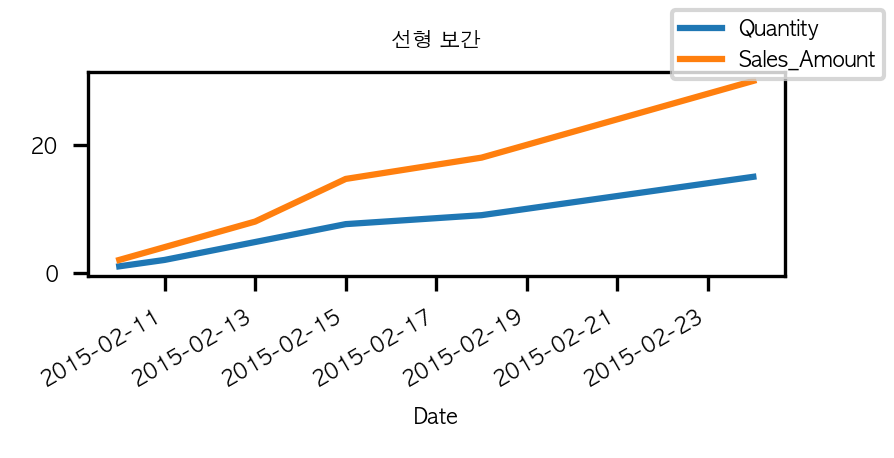

<Figure size 900x300 with 0 Axes>

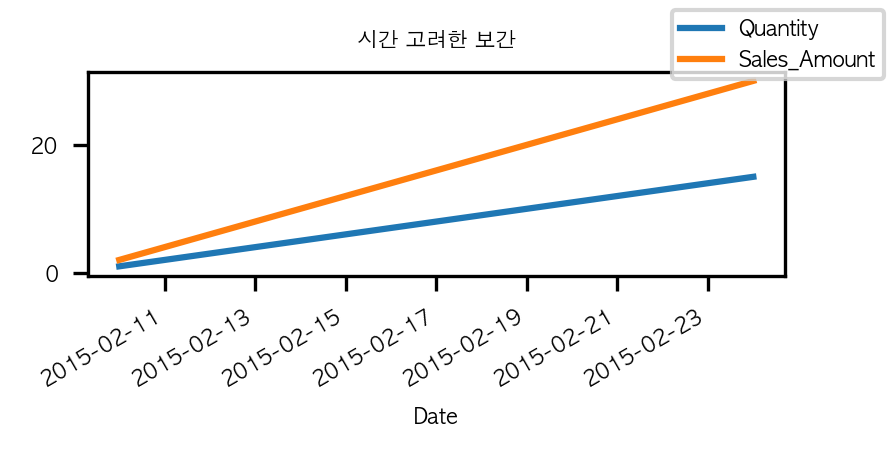

In [45]:
# plt.figure(figsize=(3,1))
test_df_intp.plot(kind='line',figsize=(3,1), legend=False)
plt.title("선형 보간", fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Date', fontsize=5)
plt.figlegend(fontsize=5)

plt.figure(figsize=(3,1))
test_df_time.plot(kind='line', figsize=(3,1), legend=False)
plt.title("시간 고려한 보간", fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Date',fontsize=5)
plt.figlegend(fontsize=5)

plt.show()